In [1]:
#Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset.
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
#Checking for Null Values.
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

C:\Users\Mohith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

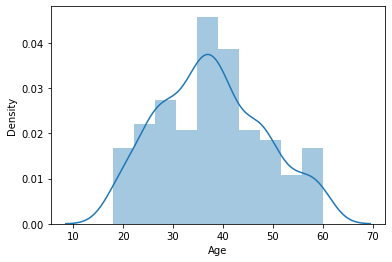

In [10]:
#Data Visualization.
sns.distplot(df["Age"])

In [11]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:>

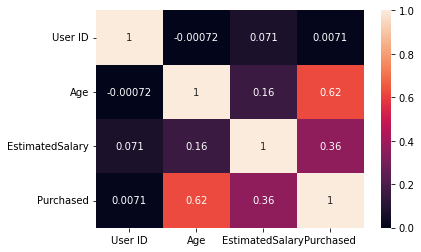

In [13]:
sns.heatmap(df.corr(),annot=True)

C:\Users\Mohith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

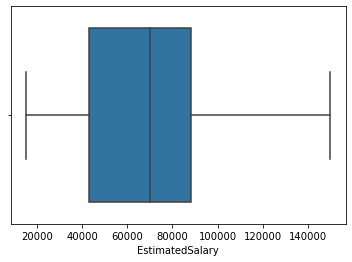

In [14]:
sns.boxplot(df.EstimatedSalary)
#sns.boxplot(df["EstimatedSalary"])

C:\Users\Mohith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

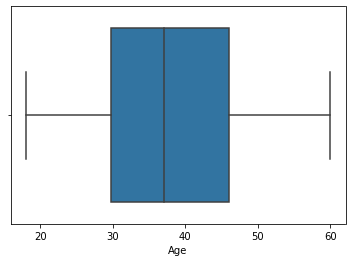

In [15]:
sns.boxplot(df.Age)

In [16]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
#Splitting Dependent and Independent variables
x=df.iloc[:,1:4]
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [19]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [20]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Gender=le.fit_transform(x.Gender)
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [21]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [22]:
x_scaled


,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852
...,...,...,...
395,0.0,0.666667,0.192593
396,1.0,0.785714,0.059259
397,0.0,0.761905,0.037037
398,1.0,0.428571,0.133333


In [23]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [25]:
x_train.head()

,Gender,Age,EstimatedSalary
336,1.0,0.952381,0.955556
64,0.0,0.976190,0.503704
55,0.0,0.142857,0.296296
106,0.0,0.190476,0.148148
300,0.0,0.952381,0.170370


# •	Model Building
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [34]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
pred=model.predict(x_test)

In [36]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [37]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [38]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [39]:
model.predict(ms.transform([[1,19,19000]]))

C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Evaluation of classification model

In [40]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [41]:
accuracy_score(y_test,pred)

0.9125

In [42]:
confusion_matrix(y_test,pred)

array([[53,  5],
       [ 2, 20]], dtype=int64)

In [43]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,53,5
1,2,20


In [45]:
(58+16)/80 #accuracy

0.925

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.80      0.91      0.85        22

    accuracy                           0.91        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.92      0.91      0.91        80



In [ ]:
# precision
# of all positive predictions how many are really positive

# precision = TP/(TP+FP)


In [ ]:
# Recall
# of all real positive cases how many are predicted positive

# Recall = TP/(FN+TP)


In [ ]:
# F1 score

# 2*precision*Recall/(Precision+Recall)

### Roc-AUC curve

In [47]:
probability=model.predict_proba(x_test)[:,1]

In [48]:
probability

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.])

In [49]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_test,probability)

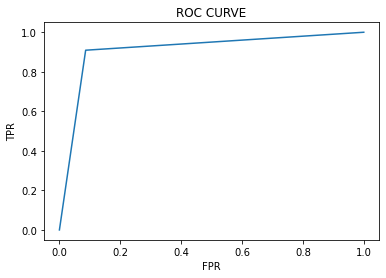

In [50]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

[Text(0.4652777777777778, 0.9666666666666667, 'X[1] <= 0.631\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.26666666666666666, 0.9, 'X[2] <= 0.559\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.17777777777777778, 0.8333333333333334, 'X[1] <= 0.44\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.15555555555555556, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.2, 0.7666666666666667, 'X[2] <= 0.507\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.17777777777777778, 0.7, 'X[2] <= 0.389\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.15555555555555556, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.2, 0.6333333333333333, 'X[2] <= 0.411\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.17777777777777778, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.5666666666666667, 'X[1] <= 0.56\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.17

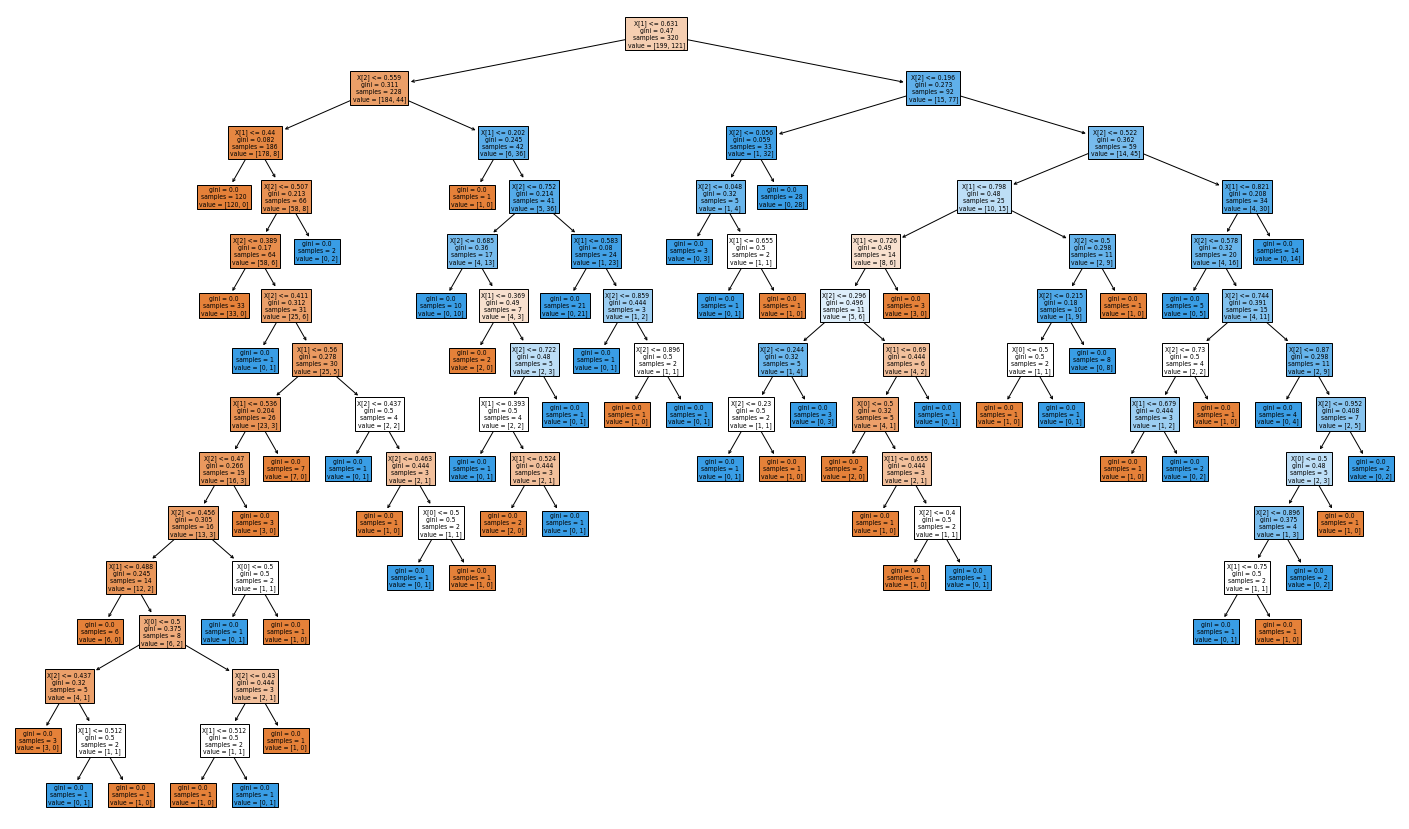

In [52]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [59]:
from sklearn.model_selection import GridSearchCV 
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [60]:
gridsearch = GridSearchCV(estimator = model , param_grid = parameter , cv = 5 , scoring ="accuracy")

In [61]:
  gridsearch.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [62]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [65]:
dtc_cv = DecisionTreeClassifier(
    criterion= 'gini',
 max_depth = 4,
 max_features = 'sqrt',
 splitter = 'best')
dtc_cv.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

In [66]:
pred = dtc_cv.predict(x_test)

In [68]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        58
           1       0.82      0.82      0.82        22

    accuracy                           0.90        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.90      0.90      0.90        80



# Random Forest 

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier()

In [71]:
forest_params = [{'max_depth' : list(range(10,15)) , 'max_features' : list(range(0,14))}]

In [73]:
rfc_cv = GridSearchCV(rfc , param_grid =  forest_params , cv = 10 , scoring = "accuracy")

In [74]:
rfc_cv.fit(x_train , y_train)

C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
550 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Mohith\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Mohith\anaconda3\lib\site-pac

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [75]:
pred = rfc_cv.predict(x_test)

In [76]:
print(classification_report(y_test , pred ))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80

